# Preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataPath = "./data/dataset.csv"
df = pd.read_csv(dataPath, index_col=0)

In [3]:
columns = list(df.columns)
columnsToKeep = columns[4: -1]
columnsToKeep

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [4]:
df = df[columnsToKeep]
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [5]:
# Bool to numerical data for explicit row
df.loc[:, 'explicit'] = df['explicit'].astype(int)

# One hot encoding for nominal categroies
df = pd.get_dummies(df, columns=['key', 'time_signature'], dtype=int)

In [6]:
df

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,230666,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,1,0
1,55,149610,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,1,0
2,57,210826,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,1,0
3,71,201933,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,1,0,0
4,82,198853,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,-16.393,1,0.0422,0.6400,0.928000,...,0,0,0,0,0,0,0,0,0,1
113996,22,385000,0,0.174,0.1170,-18.318,0,0.0401,0.9940,0.976000,...,0,0,0,0,0,0,0,0,1,0
113997,22,271466,0,0.629,0.3290,-10.895,0,0.0420,0.8670,0.000000,...,0,0,0,0,0,0,0,0,1,0
113998,41,283893,0,0.587,0.5060,-10.889,1,0.0297,0.3810,0.000000,...,1,0,0,0,0,0,0,0,1,0


In [7]:
def min_max_scaling(df):
    min_vals = df.min()
    max_vals = df.max()

    feature_range = max_vals - min_vals

    # Check if any feature has zero range
    zero_range_features = feature_range[feature_range == 0].index

    # Remove features with zero range from normalization
    valid_features = feature_range[feature_range != 0].index
    df_normalized = (df[valid_features] - min_vals[valid_features]) / feature_range[valid_features]

    # Concatenate back the zero range features
    if not zero_range_features.empty:
        df_normalized = pd.concat([df_normalized, df[zero_range_features]], axis=1)

    return df_normalized

def standard_scaling(df):
    mean = df.mean()
    std = df.std()
    return (df - mean) / std

responseFrame = df.pop('valence')
predictorFrame = df

# Min-Max scaling for predictor variables
df_normalized = min_max_scaling(predictorFrame)

# Standard scaling for predictor variables
df_standardized = standard_scaling(predictorFrame)

predictorFrame_scaled = df_normalized

# Lasso Regression

In [8]:
class LassoRegression:
    def __init__(self, lr=0.01, lambdaConstant=0.1, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.lambdaConstant = lambdaConstant
        self.weightVector = None
        self.loss_history = []

    def fit(self, X, y):
        num_samples, num_features = X.shape
        biasColumn = np.ones((num_samples, 1))
        designMatrix = np.hstack((biasColumn, X))
        self.weightVector = np.random.rand(num_features + 1)

        self.subgradientDescent(designMatrix, y)
        print('Final Train Loss:', self.lossLassoMSE(designMatrix, y))
    
    def mse_gradient(self, designMatrix, y):
        predictions = self.predict(designMatrix)
        return  -(2/y.size) * np.dot(designMatrix.T, (y - predictions))
    
    def subgradientDescent(self, designMatrix, y):
        for i in range(self.n_iters):
            gradientVector = self.lassoMSE_subgradient(designMatrix, y)

            # Update weights using subgradient descent
            self.weightVector = self.weightVector - self.lr * gradientVector
            loss = self.lossLassoMSE(designMatrix, y)
            print(f'Train Loss at iteration {i}:', loss)
            self.loss_history.append((i, loss))

        return self

    def lassoMSE_subgradient(self, designMatrix, y):
        mse_gradient = self.mse_gradient(designMatrix, y)
        lasso_gradient = np.sign(self.weightVector)
        return mse_gradient + self.lambdaConstant * lasso_gradient
    
    def predict(self, designMatrix):
        return np.dot(designMatrix, self.weightVector)
    
    def inference(self, testData):
        num_samples = testData.shape[0]
        biasColumn = np.ones((num_samples, 1))
        designMatrix = np.hstack((biasColumn, testData))
        return np.dot(designMatrix, self.weightVector)
    
    def lossMSE(self, designMatrix, y):
        predictions = self.predict(designMatrix)
        error = y - predictions
        squaredError = np.dot(error.T, error)
        meanSquaredError = 1/(y.size) * squaredError
        return meanSquaredError
    
    def lossLassoMSE(self, designMatrix, y):
        mse = self.lossMSE(designMatrix, y)
        lasso_mse = mse + self.lambdaConstant * np.sum(np.abs(self.weightVector))
        return lasso_mse
    
    def plot_loss_history(self):
        iterations, losses = zip(*self.loss_history)
        plt.plot(iterations, losses)
        plt.xlabel('Iteration')
        plt.ylabel('Training Loss')
        plt.title(f'Training Loss over Iterations - Lasso (lr = {self.lr}, iter = {self.n_iters}, lambda = {self.lambdaConstant})')
        plt.show()

## Training

In [9]:
responseData = responseFrame.to_numpy()
predictorData = predictorFrame_scaled.to_numpy()

trainSplit = 0.8
valSplit = 0.1
testSplit = 0.1

np.random.seed(42)
indices = np.arange(len(predictorData))
np.random.shuffle(indices)
trainIndices = indices[:int(trainSplit * len(indices))]
valIndices = indices[int(trainSplit* len(indices)):int((trainSplit + valSplit) * len(indices))]
testIndices = indices[int((trainSplit + valSplit) * len(indices)):]

trainPredictor, testPredictor, valPredictor = predictorData[trainIndices], predictorData[testIndices], predictorData[valIndices]
trainResponse, testResponse, valResponse = responseData[trainIndices], responseData[testIndices], responseData[valIndices]

In [10]:
import time

regressor = LassoRegression(lr = 1e-1, lambdaConstant=1e-4, n_iters= 20000)

start = time.time()
regressor.fit(trainPredictor, trainResponse)
end = time.time()
print(f'Time elapsed: {end - start:.4}')

Train Loss at iteration 0: 0.5360268742729636
Train Loss at iteration 1: 0.22389081105454506
Train Loss at iteration 2: 0.2114921068134666
Train Loss at iteration 3: 0.20634241151415553
Train Loss at iteration 4: 0.20154666725023643
Train Loss at iteration 5: 0.19693492350577704
Train Loss at iteration 6: 0.1924936376103517
Train Loss at iteration 7: 0.18821506478844283
Train Loss at iteration 8: 0.1840919619881405
Train Loss at iteration 9: 0.1801174837251714
Train Loss at iteration 10: 0.17628515390487837
Train Loss at iteration 11: 0.17258884143851866
Train Loss at iteration 12: 0.16902273778116017
Train Loss at iteration 13: 0.16558133619030754
Train Loss at iteration 14: 0.16225941255796952
Train Loss at iteration 15: 0.15905200768300867
Train Loss at iteration 16: 0.15595441086262163
Train Loss at iteration 17: 0.15296214469266842
Train Loss at iteration 18: 0.15007095097642903
Train Loss at iteration 19: 0.14727677765031436
Train Loss at iteration 20: 0.14457576664317728
Train L

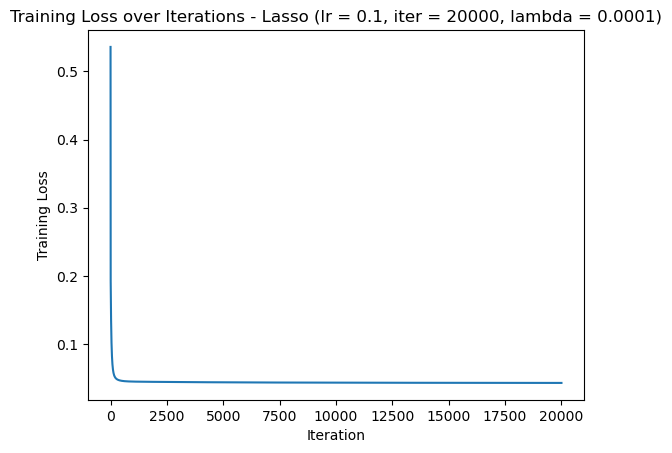

In [11]:
regressor.plot_loss_history()

## Validation Performance

In [12]:
def meanSquaredError(testResponse, predictions):
    error = testResponse - predictions
    squaredError = np.dot(error.T, error)
    meanSquaredError =  1/(testResponse.size) * squaredError
    return meanSquaredError

predictions = regressor.inference(valPredictor)
MSE = meanSquaredError(valResponse, predictions)
print(f'Validation Performance: {MSE}')

Validation Performance: 0.041683883699919454


## Measuring Performance

In [13]:
predictions = regressor.inference(testPredictor)
MSE = meanSquaredError(testResponse, predictions)
print(f'Test Performance: {MSE}')

Test Performance: 0.04213254889918555


In [14]:
demoInstanceLoc = 11021
demoPredictor = predictorData[demoInstanceLoc]
demoResponse = responseData[demoInstanceLoc]
demoPredictor = np.expand_dims(demoPredictor, axis=0)
print(demoPredictor.T.shape)
demoPrediction = regressor.inference(demoPredictor)
print('Prediction:', demoPrediction, 'Response:', demoResponse)

(29, 1)
Prediction: [0.49823065] Response: 0.599
